In [1]:
import os
import lxml
import requests
import numpy as np
import pandas as pd
import moviepy.editor as mp
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from scipy.interpolate import make_interp_spline, BSpline

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
df_rec = pd.read_csv('recession.csv')
df_rec.head()

,year,month,Recession
0,1990,6,Savings and loan crisis
1,1990,7,Savings and loan crisis
2,1990,8,Savings and loan crisis
3,1990,9,Savings and loan crisis
4,1990,10,Savings and loan crisis


In [3]:
def get_content(url):
    # Most websites refuse GET requests from python, so we change the header to pretend we're a browser.
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/56.0.2924.76 Safari/537.36'}
    page = requests.get(url, headers = headers)
    soup = BeautifulSoup(page.content, 'xml')
    return soup

In [4]:
columns = {"date":'d:NEW_DATE', 
           "1month":'d:BC_1MONTH', 
           "3month":'d:BC_3MONTH',
           "6month":'d:BC_6MONTH', 
           "1year":'d:BC_1YEAR', 
           "3year":'d:BC_3YEAR', 
           "5year":'d:BC_5YEAR', 
           "7year":'d:BC_7YEAR', 
           "10year":'d:BC_10YEAR',
           "20year":'d:BC_20YEAR', 
           "30year":'d:BC_30YEAR'}
df = pd.DataFrame(columns = columns.keys())

years = np.arange(1990, 2020)
for year in years:
    df_temp = pd.DataFrame(columns = columns.keys())
    home='https://data.treasury.gov/feed.svc/DailyTreasuryYieldCurveRateData?$filter=year(NEW_DATE)%20eq%20'+str(year)
    page = get_content(home)

    for key, value in columns.items():
        df_temp[key] = [x.get_text() for x in page.find_all(value)]
        if key != 'date':
            df_temp[key] = pd.to_numeric(df_temp[key])

    df = pd.concat([df, df_temp])

In [5]:
time = []
year = []
month = []
day = []
for i, row in df.iterrows():
    temp = str(row.date).split('T')
    time.append(temp[-1])
    temp = temp[0].split('-')
    year.append(temp[0])
    month.append(temp[1])
    day.append(temp[2])    

In [6]:
df['day'] = day
df['month'] = month
df['year'] = year
df.head()

,date,1month,3month,6month,1year,3year,5year,7year,10year,20year,30year,day,month,year
0,1990-06-08T00:00:00,NaN,7.96,8.03,8.07,8.38,8.42,8.51,8.46,NaN,8.44,08,06,1990
1,1990-06-07T00:00:00,NaN,7.96,8.01,8.07,8.38,8.41,8.49,8.46,NaN,8.43,07,06,1990
2,1990-06-11T00:00:00,NaN,7.99,8.07,8.09,8.41,8.43,8.52,8.48,NaN,8.45,11,06,1990
3,1990-06-13T00:00:00,NaN,7.93,7.99,8.02,8.32,8.35,8.44,8.40,NaN,8.39,13,06,1990
4,1990-06-12T00:00:00,NaN,7.99,8.05,8.09,8.42,8.44,8.52,8.48,NaN,8.45,12,06,1990


In [7]:
# https://www.usinflationcalculator.com/inflation/historical-inflation-rates/
# https://data.bls.gov/pdq/SurveyOutputServlet
# https://www.multpl.com/us-real-gdp-growth-rate/table/by-quarter

In [8]:
df_unemployment = pd.read_csv('unemployment.csv')
df_unemployment.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1990,5.4,5.3,5.2,5.4,5.4,5.2,5.5,5.7,5.9,5.9,6.2,6.3
1,1991,6.4,6.6,6.8,6.7,6.9,6.9,6.8,6.9,6.9,7.0,7.0,7.3
2,1992,7.3,7.4,7.4,7.4,7.6,7.8,7.7,7.6,7.6,7.3,7.4,7.4
3,1993,7.3,7.1,7.0,7.1,7.1,7.0,6.9,6.8,6.7,6.8,6.6,6.5
4,1994,6.6,6.6,6.5,6.4,6.1,6.1,6.1,6.0,5.9,5.8,5.6,5.5


In [9]:
def plot_unemployment(month, year, recession_flag):
    x = np.arange(0,13)
    y = []
    x_label = []

    year_i = year+29-2019
    if year_i > 0:
        last_year_months = np.arange(month, 13)
        this_year_months = np.arange(1, month+1)

        for m in last_year_months:
            x_label.append("{:02d}".format(m) + '/' + str(year-1)[-2:])
            y.append(df_unemployment.loc[year_i-1][m])
        for m in this_year_months:
            y.append(df_unemployment.loc[year_i][m])
            x_label.append("{:02d}".format(m) + '/' + str(year)[-2:])

    else:
        this_year_months = np.arange(1, month+1)
        rest_of_year = np.arange(month+1,13)
        for m in this_year_months:
            y.append(df_unemployment.loc[year_i][m])
            x_label.append("{:02d}".format(m) + '/' + str(year)[-2:])
        for m in rest_of_year:
            y.append(None)
            x_label.append("{:02d}".format(m) + '/' + str(year)[-2:])
        y.append(None)
        x_label.append('01/91')
    
    if recession_flag:
        ax.spines['bottom'].set_color('red')
        ax.spines['top'].set_color('red')
        ax.spines['left'].set_color('red')
        ax.spines['right'].set_color('red')
    
    plt.plot(x, y)
    plt.scatter(x, y)
    
    plt.ylim(3, 11)
    plt.xlim(-1, 13)
    plt.xticks(x, x_label)
    plt.ylabel('%')
    plt.title('Monthly unemployment rate')

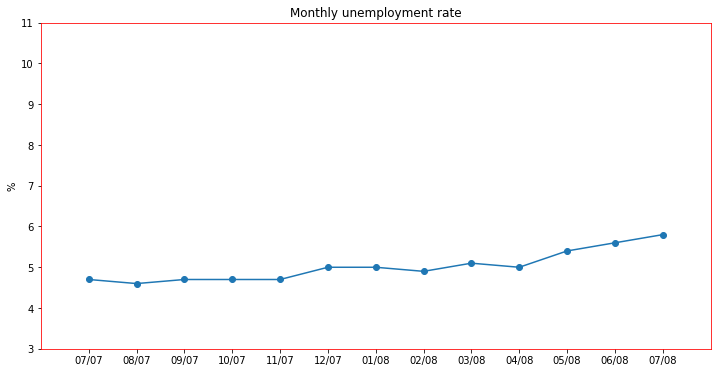

In [10]:
year = 2008
month = 7

temp = df_rec[(df_rec['year'] == year) & (df_rec['month'] == month)]
recession_flag = (len(temp) > 0)

fig, ax = plt.subplots(1, figsize=(12,6))
plot_unemployment(month, year, recession_flag)

In [11]:
df_gdp = pd.read_csv('gdp.csv')
quarters = {3:'Q1', 6:'Q2', 9:'Q3', 12:'Q4'}

In [12]:
def clean(value):
    if value is None:
        return None
    else:
        return float(value.replace('%',''))

def plot_real_gdp(month, year, recession_flag):
    x = np.arange(1,5)
    x_label = []
    
    if year == 1990:
        first_values = df_gdp[(df_gdp['Year']==year) & (df_gdp['Month'] < month+3)]['Value'].values.tolist()[::-1]
        first_months = df_gdp[(df_gdp['Year']==year) & (df_gdp['Month'] < month+3)]['Month'].values[::-1]
        last_values = [None]*(4-len(first_months))

        for i in first_months:
            x_label.append(quarters.get(i) + '-' + str(year))    

        m = month
        if month % 3 !=0:
            m = m+3
            
        remaining = df_gdp[(df_gdp['Year']==year+1) & (df_gdp['Month'] > m)]['Month'].values[::-1]
        for i in remaining:
            x_label.append(quarters.get(i) + '-' + str(year))
        
        y = first_values + last_values
    else:
        
        m = month
        if month % 3 !=0:
            m = m+3
        
        first_values = df_gdp[(df_gdp['Year']==year-1) & (df_gdp['Month'] > m)]['Value'].values.tolist()[::-1]
        first_months = df_gdp[(df_gdp['Year']==year-1) & (df_gdp['Month'] > m)]['Month'].values[::-1]
        for i in first_months:
            x_label.append(quarters.get(i) + '-' + str(year-1))

        last_values = df_gdp[(df_gdp['Year']==year) & (df_gdp['Month'] < month+3)]['Value'].values.tolist()[::-1]
        last_months = df_gdp[(df_gdp['Year']==year) & (df_gdp['Month'] < month+3)]['Month'].values[::-1]
        for i in last_months:
            x_label.append(quarters.get(i) + '-' + str(year))
        
        if year == 2019 and month > 6:
            last_values.append(None)
            x_label.append(quarters.get(9) + '-' + str(year))
            
        y = first_values + last_values  
    
    y = [clean(i) for i in y]

    if recession_flag:
        ax.spines['bottom'].set_color('red')
        ax.spines['top'].set_color('red')
        ax.spines['left'].set_color('red')
        ax.spines['right'].set_color('red')    
    
    plt.plot(x, y)
    plt.scatter(x, y)
    plt.ylim([-4.5, 6])
    plt.xlim([0.5, 4.5])
    plt.xticks(x, x_label)
    plt.ylabel('%')
    plt.xlabel('2012 dollar (inflation-adjusted)')
    plt.title('US Real GDP Growth Rate by Quarter')

In [13]:
year = 1991
month = 12
print( df_gdp[(df_gdp['Year']==year) & (df_gdp['Month'] < month+3)]['Value'].values.tolist()[::-1] )
print ( df_gdp[(df_gdp['Year']==year) & (df_gdp['Month'] < month+3)]['Month'].values[::-1] )
df_gdp[(df_gdp['Year']==year) & (df_gdp['Month'] < month+3)]

['-0.95%', '-0.54%', '-0.10%', '1.17%']
[ 3  6  9 12]


,Date,Month,Year,Value
110,31-Dec-91,12,1991,1.17%
111,30-Sep-91,9,1991,-0.10%
112,30-Jun-91,6,1991,-0.54%
113,31-Mar-91,3,1991,-0.95%


In [14]:
year = 2019
month = 6
x_label =[]

first_values = df_gdp[(df_gdp['Year']==year) & (df_gdp['Month'] < month+3)]['Value'].values.tolist()[::-1]
first_months = df_gdp[(df_gdp['Year']==year) & (df_gdp['Month'] < month+3)]['Month'].values[::-1]
last_values = [None]*(4-len(first_months))

for i in first_months:
    x_label.append(quarters.get(i) + '-' + str(year))    

print(x_label)

remaining = df_gdp[(df_gdp['Year']==year+1) & (df_gdp['Month'] > month)]['Month'].values[::-1]
for i in remaining:
    x_label.append(quarters.get(i) + '-' + str(year))
    
x_label

['Q1-2019', 'Q2-2019']


['Q1-2019', 'Q2-2019']

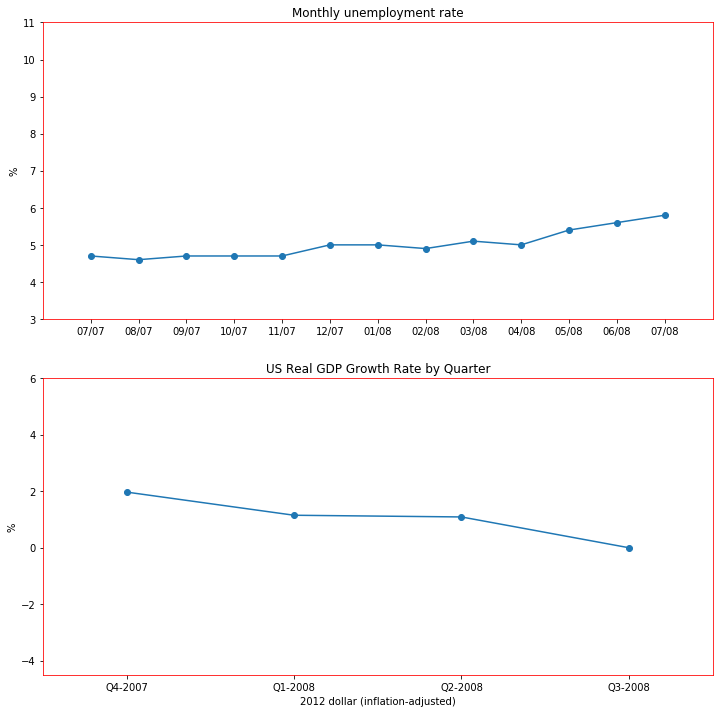

In [15]:
year = 2008
month = 7

temp = df_rec[(df_rec['year'] == year) & (df_rec['month'] == month)]
recession_flag = (len(temp) > 0)

fig, ax = plt.subplots(1, figsize=(12,12))
ax.axis('off')

ax = fig.add_subplot(211)
plot_unemployment(month, year, recession_flag)

ax = fig.add_subplot(212)
plot_real_gdp(month, year, recession_flag)

In [16]:
def plot_yield(x, y, day, month, year):
    xnew = np.linspace(x.min(),x.max(),300) #300 represents number of points to make between T.min and T.max

    spl = make_interp_spline(x, y, k=3) #BSpline object
    ynew = spl(xnew)

    plt.plot(xnew,ynew)
    plt.scatter(x,y, s=25)
    plt.plot([1,5], (y[0], y[-1]), color = 'grey', alpha = 0.8, linestyle='--')
    
    plt.title('U.S. TREASURY YIELD CURVE\n' + day + '/' + month + '/' + year, fontsize = 16)
    plt.ylim([0,10])
    plt.xticks(x, ['3month', '6month', '1year', '3year', '10year'])
    spread = y[-1] - y[0]
    color = 'black'
    if spread < 0:
        color = 'red'
    
    plt.text(4, 10.2, 'Spread:' + "{:.2f}".format(spread), color = color, fontsize = 16)

In [17]:
x = np.array([1,2,3,4,5])
df.dropna(subset=['3month', '6month', '1year', '3year', '10year'], inplace = True)
df.sort_values(by=['year', 'month', 'day'], inplace = True)

for i, y in enumerate(df[['3month', '6month', '1year', '3year', '10year']].values):
    day = df.iloc[i]['day']
    month = df.iloc[i]['month']
    year = df.iloc[i]['year']
    
    temp = df_rec[(df_rec['year'] == int(year)) & (df_rec['month'] == int(month))]
    recession_flag = (len(temp) > 0)
    fig, ax = plt.subplots(1, figsize=(18,14))
    ax.axis('off')
    
    ax = fig.add_subplot(211)
    plot_yield(x, y, day, month, year)
    
    ax = fig.add_subplot(212)
    if recession_flag:
        plt.title('RECESSION\n', color = 'red')
    else:
        plt.title('EXPANSION\n')
        
    if i%100 == 0:
        print(i)
        
    ax.axis('off')
    
    ax = fig.add_subplot(223)
    plot_unemployment(int(month), int(year), recession_flag)

    ax = fig.add_subplot(224)
    plot_real_gdp(int(month), int(year), recession_flag)
    
    dir_path = '\\py\\yield\\'
    plt.savefig(dir_path + str(i) + '.png', facecolor='white', edgecolor='none')
    plt.close()

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400


In [ ]:
clip_list = [dir_path + '\\' + str(i) + '.png' for i in np.arange(0,7411)]
#clip_list.append([dir_path + '\\7410.png']*10)
clip = mp.ImageSequenceClip(clip_list, fps=60)
clip.write_videofile("myvideo.mp4")

Moviepy - Building video myvideo.mp4.
Moviepy - Writing video myvideo.mp4



t:  91%|███████████████████████████████████████████████████████████▎     | 6767/7411 [08:03<00:48, 13.25it/s, now=None]

In [21]:
np.arange(0,7410)

array([   0,    1,    2, ..., 7407, 7408, 7409])

In [20]:
df_rec

,year,month,Recession
0,1990,6,Savings and loan crisis
1,1990,7,Savings and loan crisis
2,1990,8,Savings and loan crisis
3,1990,9,Savings and loan crisis
4,1990,10,Savings and loan crisis
5,1990,11,Savings and loan crisis
6,1990,12,Savings and loan crisis
7,1991,1,Savings and loan crisis
8,1991,2,Savings and loan crisis
9,1991,3,Savings and loan crisis
